## K-최근접 이웃( K-Nearest Neighbor) 알고리즘

#### K-최근접 이웃 알고리즘  
- K-Nearest Neighbor : K-NN
- 데이터를 가장 가까운 속성에 따라 분류하여 레이블링 하는 알고리즘
- K개의 가까운 이웃의 속성에 따라 분류 
    - 주변의 가장 가까운 K개의 데이터를 보고 데이터가 속할 그룹을 판단
- 유클리안 거리 사용 
---
### 사이킷런의 KNN 알고리즘 클래스
- 분류 모델을 위한 KNeighborsClassifier
- 회귀 모델을 위한 KNeighborsRegressor
- 매개변수 동일 
---
- KNeighborsClassifier 주요 매개변수
  - n_neighobrs : 디폴트 5
  - weights 
    - uniform : 각 이웃의 포인트에 동일한 가중치 부여 (디폴트)  
    - distance : 거리의 역수로 가중치 부여. 
      - 가까운 데이터가 멀리 있는 데이터보다 큰 영향을 미침 
---
그림에서    
- 소속 그룹 판단
    - K=1인 경우 : 노란색 그룹
    - K=3인 경우 : 파란색 그룹

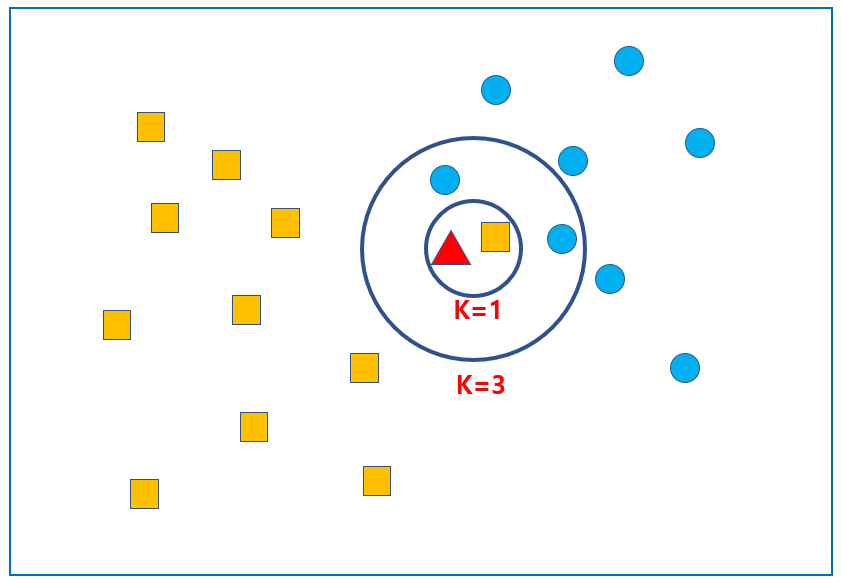

### K-최근접 이웃 알고리즘 예제

### K-최근접 이웃 알고리즘 예측 프로세스
- (1) 데이터 세트 준비 : 도미와 빙어 길이와 무게 데이터   
    - 길이와 무게 각 49 데이터 : 도미(35) / 빙어(14)    
    - 피처 데이터 / 레이블 데이터 생성     
- (2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트    
- (3) 모델 학습 / 평가 / 예측     
    - 결과 : 잘못 예측    
- (4) 길이/무게 두 변수 스케일링    
- (5) 스케일된 값으로 모델 학습 / 평가 / 예측   

### (1) 데이터 세트 준비 : 도미와 빙어 길이와 무게 데이터  
- 길이와 무게 각 49 데이터 : 도미(35) / 빙어(14)  
- 피처 데이터 / 레이블 데이터 생성 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [6]:
# 도미와 빙어 데이터 준비 (길이와 무게)
# 큰 수치 35개 : 도미
# 작은 수치 14개 : 빙어

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,  31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,  10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,  500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,  700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,  7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [12]:
len(fish_length)
len(fish_weight)

49

49

###  데이터 합치기
- np.concatenate() : 1차원 배열로 합치기 (옆으로)
- np.column_stack() : 2차원 배열로 합치기


In [13]:
# 피처 데이터 생성
# 데이터 합치기 : [길이, 무게] 2차원 형태 (())

fish_data = np.column_stack((fish_length, fish_weight))
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [16]:
# label data : target 값
# 49개의 값 중 앞 35는 도미(1), 뒤의 14개는 방어(0)으로 구분
# np.ones(개수) : 개수만큼 1 생성
# np.zeros(개수) : 개수만큼 0 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
# 피처 데이터와 레이블 데이터 준비 완료
# fish_data, fish_target

### (2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fish_data,
                                                fish_target,
                                                stratify = fish_target,
                                                random_state=42)
# stratify = y값 (레이블 데이터)
# 레이블 값에서 원본의 0과 1의 비율을 유지하면서 데이터 세트 분리하는 옵션
# test_size=0.2 지정 안했음 (automatically 약 26.5%로 지정되었음)
# 13 / 49

In [23]:
13/49

0.2653061224489796

In [21]:
X_train.shape
X_test.shape # 전체 49개 중에 13개
y_train.shape
y_test.shape

(36, 2)

(13, 2)

(36,)

(13,)

In [35]:
# stratify = fish_target 옵션 설정한 경우

# 전체 49개 중에서 0과 1의 비율

# fish_target.value_counts(normalize=True) 
# ndarray는 value_counts가 없다고 뜬다.
# 시리즈로 바꿔서 해야한다.

# fish_target
pd.Series(fish_target).value_counts(normalize=True)

# y_train
pd.Series(y_train).value_counts(normalize=True)

# y_test
pd.Series(y_test).value_counts(normalize=True)

1.0    0.714286
0.0    0.285714
Name: proportion, dtype: float64

1.0    0.722222
0.0    0.277778
Name: proportion, dtype: float64

1.0    0.692308
0.0    0.307692
Name: proportion, dtype: float64

In [32]:
# stratify = fish_target 옵션 설정 안한 경우
X_train, X_test, y_train, y_test = train_test_split(fish_data,
                                                fish_target,
                                                random_state=42)

In [33]:
# 0과1의 비율
# fish_target
pd.Series(fish_target).value_counts(normalize=True)

# y_train
pd.Series(y_train).value_counts(normalize=True)

# y_test
pd.Series(y_test).value_counts(normalize=True)

1.0    0.714286
0.0    0.285714
Name: proportion, dtype: float64

1.0    0.694444
0.0    0.305556
Name: proportion, dtype: float64

1.0    0.769231
0.0    0.230769
Name: proportion, dtype: float64

### (3) 모델 학습 / 평가 / 예측 

In [37]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier() # n_neighbors=5 디폴트
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
# 임의의 테스트 데이터로 예측
# 훈련된 모델에 길이가 25cm, 무게가 150g인 생선으로 테스트 수행
kn_clf.predict([[25, 150]])

# 예측 결과
# 0 (빙어) 로 예측 -> 잘못예측

# [25, 150] : 오류
# expected 2D array, got 1d array instead -> [[25, 150]]

array([0.])

#### 빙어로 예측한 이유 확인 : 산점도 확인
- 누구를 이웃으로 판단하는지 확인 필요 

Text(0.5, 0, '길이')

Text(0, 0.5, '무게')

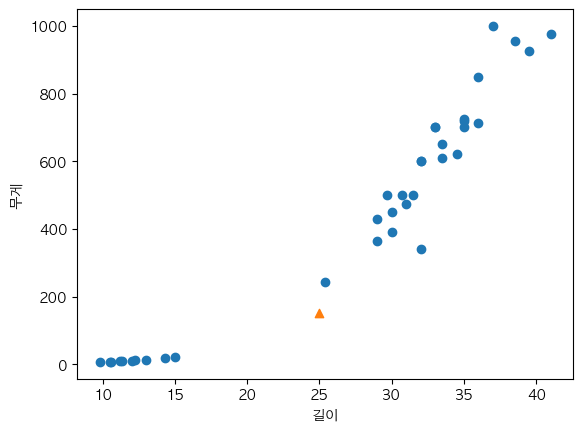

In [51]:
# 산점도 그래프 확인
# x 축 : 길이
# y 축 : 무게

# plt.scatter(fish_length, fish_weight)
# [:,0] : x (길이) [:,1] : y(무게) 동일 방법
plt.scatter(X_train[:,0], X_train[:,1])

# [25, 150] 이 어디에 위치해 있나 확인
plt.scatter(25, 150, marker='^')

plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

# 결과
# 눈으로 봤을때 누가봐도 큰 도미쪽임

In [125]:
# 가장 가까운 이웃 찾아서 확인
# kneighbors() 사용 : 거리, 인덱스
# 이웃까지의 거리와 이웃 샘플의 인덱스 값 반환
# 기본 값 5 : 5개 이웃의 거리와 인덱스 반환

dist, idx = kn_clf.kneighbors([[25, 150]])
# dist : 이웃과의 거리
# idx : 이웃의 인덱스

In [55]:
dist
idx

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

array([[21, 33, 19, 30,  1]])

In [56]:
X_train[idx]
# 이웃이라고 생각하는 5개 샘플 확인
# 4개가 빙어 수치
# 그래서 빙어로 예측한 것!

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

Text(0.5, 0, '길이')

Text(0, 0.5, '무게')

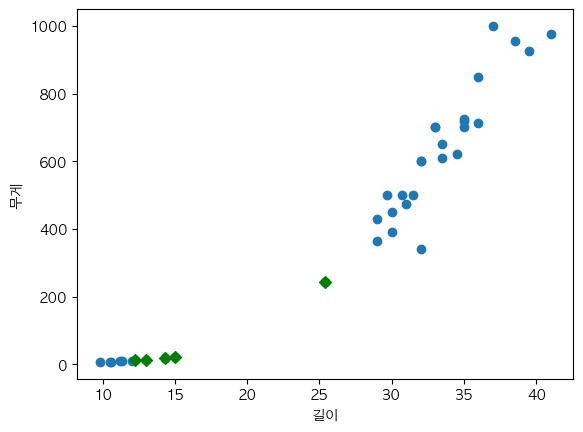

In [68]:
# 그래프에 5개 이웃 표시
plt.scatter(X_train[:,0], X_train[:,1])

# 인접이웃 5개가 어디에 위치해 있나 확인
# idx : array([[21, 33, 19, 30,  1]])
plt.scatter(X_train[idx, 0], X_train[idx, 1], marker='D', color='green')

plt.xlabel('길이')
plt.ylabel('무게')
plt.show()


# 결과
# 최근접 이웃 5개중 4개가 빙어, 1개만 도미
# 따라서 [25, 150]은 이웃 수가 더 많은 빙어로 판단했음

In [72]:
# [25, 150]과 첫 번째 이웃, 두번 째 이웃과의 거리 확인
from scipy.spatial import distance
distance.euclidean((25.4, 242), (25, 150)) 
distance.euclidean((15, 19.9), (25, 150))

92.00086956110796

130.4837537780087

#### 결과가 잘못 나온 이유  
- 길이와 무게가 1대1로 모델에 반영되려면 크기가 비슷해야 하는데,   
- 길이에 비해 무게가 크기가 너무 커서 길이와 무게가 다른 비율로 반영됨  
- 거리 92와 130 비율이 이상함  
- x축은 범위가 좁고, y축은 범위가 넓기 때문에, 실제 거리가 크게 증가함  
- 즉, 두 변수의 값이 스케일이 다르다고 할 수 있음  
- 스케일링 필요 : 표준 스케일링 적용 

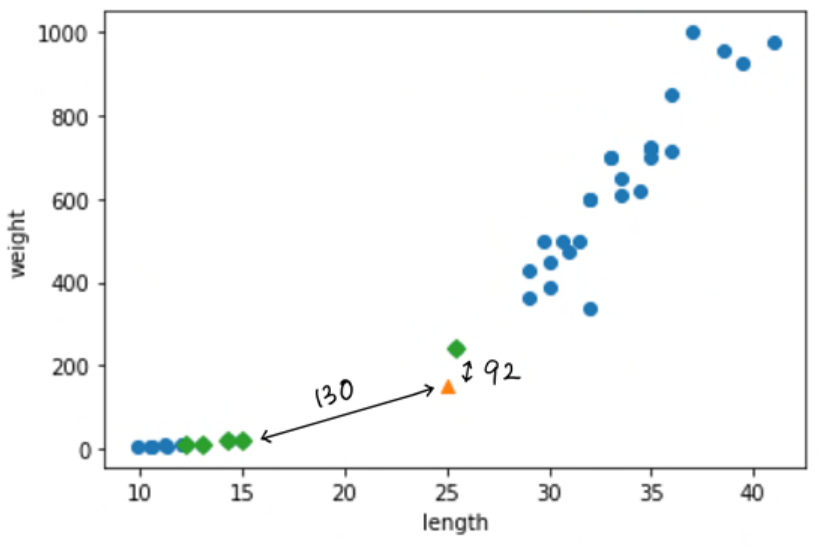

### (4) 길이/무게 두 변수 스케일링

#### z-점수 표준화(z-score standardization)   
    - 데이터의 평균을 0, 분산을 1이 되도록 스케일링하는 것  
    - 표준 스케일링과 동일 : StandardScaler와 결과 동일  
    - 각 값이 평균에서 얼마나 떨어져 있는지를 나타내는 척도    
    - 이상치 문제를 피하는 데이터 정규화 벙법으로 사용     
    - (원점수 - 평균) / 표준편차    

In [76]:
# 평균 구하기
mean = np.mean(X_train, axis=0)
mean

# 표준편차
std = np.std(X_train, axis=0)
std

array([ 27.29722222, 454.09722222])

array([  9.98244253, 323.29893931])

In [78]:
# X_train 스케일링 : (원점수 - 평균) / 표준편차

X_train_scaled = (X_train-mean)/std
X_train_scaled[:10]

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721]])

In [80]:
# 표준 스케일링 확인
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled[:10]

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721]])

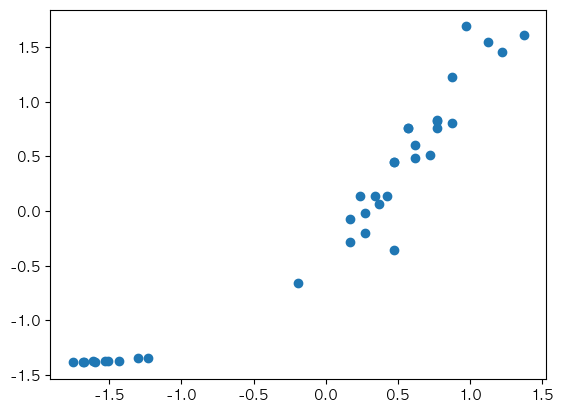

In [81]:
# scaling된 데이터로 그래프 출력
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])

# 분포 동일
# x축과 y축의 범위가 동일하게 변경

### (5) 스케일된 값으로 모델 학습 / 평가 / 예측

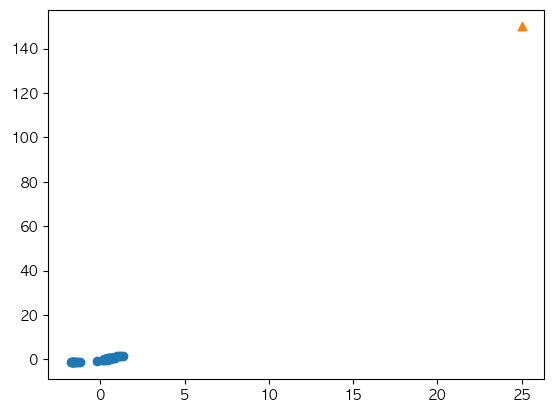

In [84]:
# X_train_scaled와 [25, 150]위치 확인
plt.scatter(X_train_scaled[:,0], X_train_scaled[:, 1])
plt.scatter(25, 150, marker='^') # [25, 150] 그대로 넣으면 엉뚱한 분포가 나옴
# 그래프 출력 결과
# x축, y축 범위가 25, 150범위에 맞춰 확장되었음
# 이유: 스케일링 안된 수치로 테스트 했기 때문
# [25, 150]도 스케일링해야함

#### 테스트 데이터도 스케일링

In [86]:
test_data = [25, 150]

In [94]:
# 전체 평균 구하기
mean = np.mean(X_train, axis=0)
mean

# 전체 표준편차
std = np.std(X_train, axis=0)
std

array([ 27.29722222, 454.09722222])

array([  9.98244253, 323.29893931])

In [93]:
# 테스트 데이터 스케일링
test_scaled = (test_data-mean)/std
test_scaled

array([-0.23012627, -0.94060693])

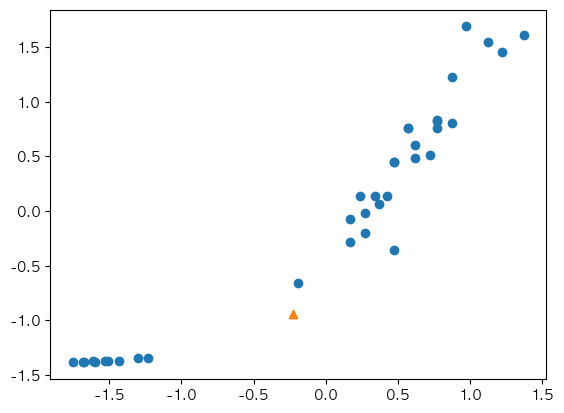

In [96]:
# 테스트 데이터 스케일링 한 값 스케일링한 그래프에 표시
plt.scatter(X_train_scaled[:,0], X_train_scaled[:, 1])
plt.scatter(test_scaled[0], test_scaled[1], marker='^') # [25, 150] 그대로 넣으면 엉뚱한 분포가 나옴

In [97]:
# 재학습 : 스케일링 된 학습 데이터로 재학습
kn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [99]:
# (25, 150) 스케일링된 수치로 예측 수행
kn_clf.predict([test_scaled])
# 1 (도미)로 예측 --> 정확

array([1.])

In [100]:
# 스케일링 데이터로 평가 수행
# 오차행렬, 정확도, 정밀도, 재현율, F1 , ROC_AUC 

In [115]:
 # X_test 데이터 스케일링
X_test_scaled = (X_test - mean) / std
X_test_scaled

array([[-1.63258863, -1.37457062],
       [-1.55244793, -1.37395199],
       [ 0.24070039, -0.01267317],
       [-1.55244793, -1.37364268],
       [-0.07986244, -0.35291555],
       [-1.4923424 , -1.3631261 ],
       [ 0.67145669,  0.71420828],
       [ 0.67145669,  0.3739659 ],
       [ 1.12224816,  1.44108972],
       [ 0.77163257,  0.69874271],
       [-0.09989762, -0.50757117],
       [ 0.37092904,  0.14198246],
       [ 1.37268787,  1.5338831 ]])

In [118]:
y_pred = kn_clf.predict(X_test_scaled) # 예측 수행

In [119]:
# 예측 확률
kn_clf.predict_proba(X_test_scaled)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [102]:
# 평가 수행 : 다양한 평가지표로 수행
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, y_pred, pred_proba):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
     # 오차행렬
    print('오차행렬 : ', cm)
    # 정확도, 정밀도, 재현율, F1
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f},  F1 : {f1:.4f}, ROC_AUC : {roc_auc:.4f}")

In [126]:
# label 값이 1일 때의 예측 확률
pred_proba = kn_clf.predict_proba(X_test_scaled)[:, 1] 
# 함수 실행
get_clf_eval(y_test, y_pred, pred_proba) 

오차행렬 :  [[4 0]
 [0 9]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000,  F1 : 1.0000, ROC_AUC : 1.0000


Text(0.5, 0, '길이')

Text(0, 0.5, '무게')

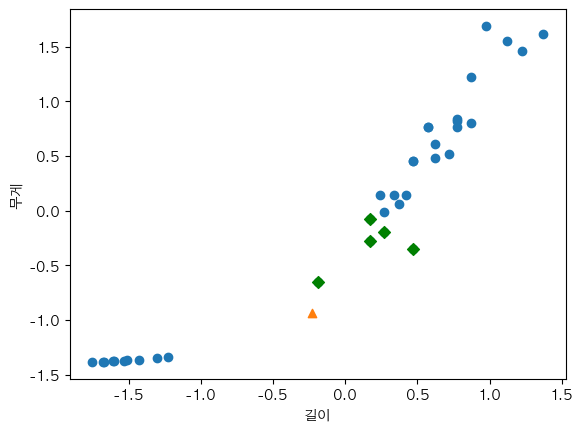

In [133]:
### 바뀐 그래프로 다시 그리기

# 이웃 5개 인덱스 찾기
dist, idx = kn_clf.kneighbors([test_scaled])

# 전체 그래프 (스케일링된)
plt.scatter(X_train_scaled[:,0], X_train_scaled[:, 1])

# 인접이웃 그래프 표시
plt.scatter(X_train_scaled[idx, 0], X_train_scaled[idx, 1], marker='D', color='green')

# 테스트 데이터 그래프 표시
plt.scatter(test_scaled[0], test_scaled[1], marker='^') 

plt.xlabel('길이')
plt.ylabel('무게')
plt.show()